In [ ]:

# from google.colab import  drive
# drive.mount('/content/drive')

# You can instead clone the cirq_cupy repo

In [ ]:
# %cd drive/My\ Drive/

In [ ]:
# navigate to the Cirq repo in cirq
%cd Cirq

In [5]:
import cirq
import time
import cupy as cp
start_time = time.time()
function=0
Dtime_result = []
for n in range(3,28):
  q = [cirq.NamedQubit("a"+str(i)) for i in range(n)]
  circuit = cirq.Circuit()
  moments = [cirq.H(q[i]) for i in range(n)]
  if function!=None:
      for i in range(n-1):
        moments += [cirq.CNOT(q[i], q[-1])]

  moments += [cirq.H(q[i]) for i in range(n-1)]
  circuit.append(moments)

  simulator = cirq.Simulator()
  initial_state = cp.array([0]*(2**n))
  initial_state[1] = 1
  results = simulator.simulate(circuit, initial_state=initial_state, qubit_order=q)
  Dtime_result.append(time.time() - start_time)

In [ ]:
Dtime_result

[0.005408048629760742,
 0.011189937591552734,
 0.01640939712524414,
 0.022728681564331055,
 0.030040502548217773,
 0.03853297233581543,
 0.04846549034118652,
 0.05917048454284668,
 0.07071423530578613,
 0.08397936820983887,
 0.09830236434936523,
 0.11416292190551758,
 0.13199234008789062,
 0.15342473983764648,
 0.17996597290039062,
 0.2169175148010254,
 0.2715115547180176,
 0.3690464496612549,
 0.5572605133056641,
 0.9344820976257324,
 1.6972339153289795,
 3.0916144847869873,
 5.971081256866455,
 11.6922447681427,
 23.124481201171875]

In [39]:
import cupy as cp
import cirq
import time
from cirq.experiments.google_v2_supremacy_circuit import *
def experiment1(n, m, cz_depth, seed, qubits_to_be_ignored=None):
  # qubits = [cirq.GridQubit(i,j) for i in range(n) for j in range(n)]
  circuit = generate_boixo_2018_supremacy_circuits_v2_grid(n_rows=n, n_cols=m, cz_depth=cz_depth, seed=seed)
  supremacy_circuit = cirq.Circuit()
  for moment in circuit:
    for operation in moment:
      if not set(qubits_to_be_ignored) & set(operation.qubits):
        supremacy_circuit.append(operation)
  s = n*m-len(qubits_to_be_ignored)
  initial_state_vector = cp.array([0]*2**s)
  initial_state_vector[0] = 1
  time_result = []
  qubits = list(supremacy_circuit.all_qubits())
  for p in range(10):
    start_time = time.time()
    simulator = cirq.Simulator()
    results = simulator.simulate(supremacy_circuit, initial_state = initial_state_vector, qubit_order = qubits)
    time_result.append(time.time() - start_time)
  time_result = cp.array(time_result)
  return supremacy_circuit, results, cp.mean(time_result)


In [42]:
import numpy as np
from itertools import product
from random import sample
time_results = []
c, r, mt = experiment1(n=2, m=2, cz_depth=4, seed=2, qubits_to_be_ignored=[])
X = [4]
time_results.append(mt)

for n in range(3,6):
  list_of_indices = list(product(range(n),repeat=2))
  for i in range(2*n-2, -1,-1):
    X.append(n**2-i)
    qubits_to_be_ignored = [cirq.GridQubit(x[0], x[1]) for x in sample(list_of_indices, i)]
    circuit, result, x = experiment1(n=n, m=n, cz_depth=2*n,seed=2, qubits_to_be_ignored=qubits_to_be_ignored)
  # circuit, result, x = experiment1(n=n, m=n, cz_depth=2*n,seed=2)
    time_results.append(x)

c, r, mt = experiment1(n=7, m=4, cz_depth=14, seed=1, qubits_to_be_ignored=[cirq.GridQubit(0,0), cirq.GridQubit(0,1)])
X.append(26)
time_results.append(mt)

c, r, mt = experiment1(n=7, m=4, cz_depth=14, seed=1, qubits_to_be_ignored=[cirq.GridQubit(0,0)])
X.append(27)
time_results.append(mt)


X = np.array(X)
y1 = np.array(time_results)

# These numbers are from the supremacy_cir_with_numpy
y2 = np.array([0.004195451736450195, 0.0038480520248413085, 0.005486869812011718, 0.004797840118408203, 0.006438493728637695, 0.008353686332702637, 0.008139204978942872, 0.010401463508605957, 0.011721992492675781, 0.01622469425201416, 0.021231603622436524, 0.030955195426940918, 0.05592355728149414, 0.20605340003967285, 0.34598114490509035, 0.5079902172088623, 1.0100622415542602, 2.0481415510177614, 4.197118926048279, 8.385995697975158, 16.85278730392456, 36.125806427001955, 94.51600887775422, 198.4059149980545])
y3 = np.array([0.0036581993103027345, 0.001595783233642578, 0.0019182443618774414, 0.00233311653137207, 0.0025788545608520508, 0.0027222633361816406, 0.002931499481201172, 0.0032016992568969726, 0.00416877269744873, 0.003957128524780274, 0.004674053192138672, 0.005312824249267578, 0.007239437103271485, 0.009012174606323243, 0.012385129928588867, 0.02064509391784668, 0.04414701461791992, 0.10217959880828857, 0.2147991418838501, 0.46319141387939455, 1.031615924835205, 2.1322256326675415, 5.9295084238052365, 12.252466011047364])
y1

array([array(0.00625405), array(0.00901821), array(0.01123056),
       array(0.01364348), array(0.01479173), array(0.01684647),
       array(0.01985195), array(0.02334197), array(0.02363589),
       array(0.02542107), array(0.02823827), array(0.03017416),
       array(0.03260214), array(0.04164526), array(0.04168057),
       array(0.0439697), array(0.05285158), array(0.07547131),
       array(0.1434798), array(0.28128653), array(0.57800946),
       array(1.21078665), array(3.08967879), array(6.42504966)],
      dtype=object)

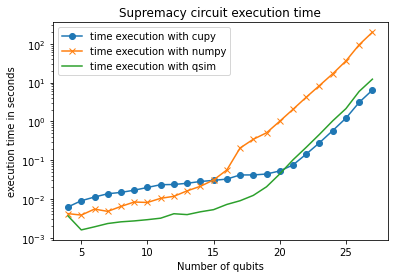

In [43]:
# Ploting the supremacy circuits' execution time
import matplotlib.pyplot as plt
import numpy as np
plt.figure()
plt.plot(X,y1, label="time execution with cupy", marker='o')
plt.yscale('log')
plt.plot(X,y2, label="time execution with numpy", marker="x")
plt.yscale('log')
plt.plot(X,y3, label="time execution with qsim")
plt.yscale('log')
plt.xlabel("Number of qubits")
plt.ylabel("execution time in seconds")
plt.title("Supremacy circuit execution time")
plt.legend()

In [ ]:
# Deutsch alg execution time with cupy 
y3 = Dtime_result

# These numbers are from supremacy_cir_with_numpy
y4 = [0.005854129791259766,
 0.0013790130615234375,
 0.0014646053314208984,
 0.001741170883178711,
 0.002026081085205078,
 0.0024695396423339844,
 0.0027348995208740234,
 0.003202676773071289,
 0.003937721252441406,
 0.004748106002807617,
 0.005673408508300781,
 0.007822751998901367,
 0.011965274810791016,
 0.02459120750427246,
 0.042424678802490234,
 0.07975006103515625,
 0.15691471099853516,
 0.34197497367858887,
 0.7501974105834961,
 1.543952226638794,
 3.1929843425750732,
 6.614231109619141,
 13.492998838424683,
 27.667491674423218,
 56.77741861343384]

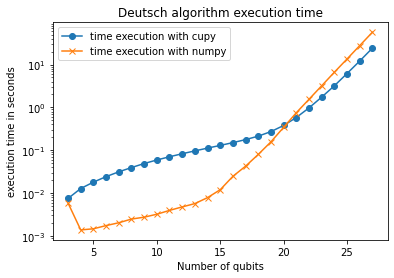

In [ ]:
# Plotting Deutsch alg execution 
import matplotlib.pyplot as plt
import numpy as np
y3 = np.array(y3)
y4 = np.array(y4)
x = np.array(range(3,28))
plt.figure()
plt.plot(x,y3, label="time execution with cupy", marker="o")
plt.yscale('log')
plt.plot(x,y4, label="time execution with numpy", marker="x")
plt.yscale('log')
plt.xlabel("Number of qubits")
plt.ylabel("execution time in seconds")
plt.title("Deutsch algorithm execution time")
plt.legend()

In [ ]:
# !cp -avr /content/drive/MyDrive/mathematics /usr/local/lib/python3.7/dist-packages
# make sure to import the mathematics package from quantify

In [44]:
import cirq
import mathematics.multiplier as mt
import cupy as cp
import time

def multiplier_experiment(n, qubits_to_be_ignored=[]):

    # A and B are the numbers to be multiplied
    A = [cirq.NamedQubit('a' + str(i)) for i in range(n)]
    B = [cirq.NamedQubit('b' + str(i)) for i in range(n)]

    # instanciate the multiplier class and invoke the multiply method
    # the result is the corresponding circuit
    circuit = mt.multiplier(A, B).multiply()
    final_circuit = cirq.Circuit()
    for moment in circuit:
      for operation in moment:
        if not set(qubits_to_be_ignored) & set(operation.qubits):
          final_circuit.append(operation)
    
    
    simulator = cirq.Simulator()

    # sort the qubits in a way such that B has the most significant bits then A then P
    
    qubits = sorted(list(final_circuit.all_qubits()))[::-1]

    s = len(qubits)
    print(s)
    intial_state = [0] * 2 ** (len(qubits))

    intial_state[0] = 1
    intial_state = cp.array(intial_state, dtype=np.complex64)
    start_time = time.time()
    result = simulator.simulate(final_circuit, qubit_order=qubits, initial_state=intial_state)
    time_result = time.time()-start_time

    # """Now consider B and A as a concatinated bitstring with B having the most significant bits
    #     Afterwards add 2n+1 bits of 0 which represents P0, P1...P2n
    # """

    # """the list of all possible integers is exactly the range(2^(2n)) but we need to shift it 
    #     in order to initialize the qubits of P to 0
    # """
    # shift = 2 ** n - 1
    # # list_of_possible_integers = [i << shift for i in range(2 ** (2 * n))]
    # list_of_possible_integers = [2 ** (2 * n)-2]
    # # print(list_of_possible_integers)
    # for i in list_of_possible_integers:
    #     intial_state[i] = 1
    #     # state[1920]=1
    #     intial_state = np.array(intial_state, dtype=np.complex64)
    #     start_time = time.time()
    #     result = simulator.simulate(circuit, qubit_order=qubits, initial_state=intial_state)
    #     time_result = time.time()-start_time
    #     BA = i >> shift
    #     B_times_A = BA % (2 ** 3) * (BA >> n)
    #     # assert (np.where(result.final_state == 1)[0][0] == i + B_times_A)
    #     intial_state[i] = 0
    return time_result


In [60]:
import numpy as np
from itertools import product
from random import sample
time_results = []
time_results.append(multiplier_experiment(3, qubits_to_be_ignored=[]))
for n in range(4,8):
  # list_of_indices = list(product(range(n),repeat=2))
  if n == 7:
    for i in range(3,1,-1):
      qubits_to_be_ignored = [cirq.NamedQubit("P"+str(j)) for j in range(i)]
      time_results.append(multiplier_experiment(n, qubits_to_be_ignored=qubits_to_be_ignored))
  else:
    for i in range(3,-1,-1):
      qubits_to_be_ignored = [cirq.NamedQubit("P"+str(j)) for j in range(i)]
      time_results.append(multiplier_experiment(n, qubits_to_be_ignored=qubits_to_be_ignored))


13
14
15
16
17
18
19
20
21
22
23
24
25
26
27


In [61]:
time_results

[0.017586946487426758,
 0.0268857479095459,
 0.030800342559814453,
 0.03242325782775879,
 0.0339810848236084,
 0.05010986328125,
 0.05491805076599121,
 0.058710575103759766,
 0.06209850311279297,
 0.1032257080078125,
 0.15276765823364258,
 0.2462148666381836,
 0.4233129024505615,
 1.225797414779663,
 2.31611704826355]

In [62]:
y5 = [0.0160977840423584, 0.01616835594177246, 0.031195878982543945, 0.08072137832641602, 0.04287838935852051, 0.20384621620178223, 0.28908276557922363, 0.4622933864593506, 0.7720737457275391, 2.040431499481201, 3.806870222091675, 7.404092073440552, 15.099214553833008, 40.45326542854309, 84.57066607475281]
y6 = [0.006653547286987305, 0.010313034057617188, 0.010963916778564453, 0.01484370231628418, 0.022917985916137695, 0.06537890434265137, 0.09955430030822754, 0.2655363082885742, 0.585322380065918, 1.4442849159240723, 2.9331512451171875, 6.070271253585815, 11.998790979385376, 33.90473747253418, 56.47514629364014]

In [63]:
x = np.array(range(13,28))

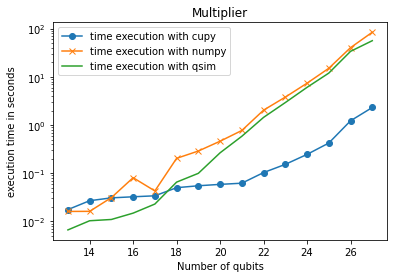

In [64]:
import matplotlib.pyplot as plt
import numpy as np
y4 = np.array(time_results)
y5 = np.array(y5)
plt.figure()
plt.plot(x,y4, label="time execution with cupy", marker="o")
plt.yscale('log')
plt.plot(x,y5, label="time execution with numpy", marker="x")
plt.yscale('log')
plt.plot(x,y6, label="time execution with qsim")
plt.yscale('log')
plt.xlabel("Number of qubits")
plt.ylabel("execution time in seconds")
plt.title("Multiplier")
plt.legend()